# 1. Load dataset

In [1]:
 %matplotlib inline
import math    
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("exams.csv")
data_orig = data.copy()
data_orig.head()

,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data['exam_1'] = (data_orig['exam_1'] - data_orig['exam_1'].min())/data_orig['exam_1'].values.ptp()
data['exam_2'] = (data_orig['exam_2'] - data_orig['exam_2'].min())/data_orig['exam_2'].values.ptp()

# 2. Visualize

#### Plot a graph of first exam score vs second exam score. Admitted student points should be differ from failed student points.

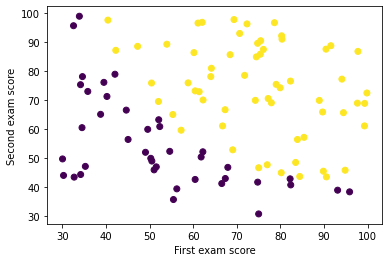

In [4]:
plt.xlabel("First exam score")
plt.ylabel("Second exam score")
plt.scatter(data_orig['exam_1'], data_orig['exam_2'], c=data['admitted'])

# 3. Logistic Regression

#### Implement Logistic Regression from scratch (using numpy)
a) Implement a function which returns sigmoid of a value given the value.

In [5]:
sigmoid = lambda z: 1/(1 + np.exp(-z))

b) Implement the following cost function.
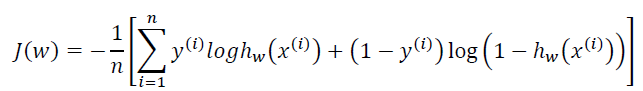

In [6]:
logloss = lambda h, y: (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [7]:
X = np.concatenate((np.ones((len(data), 1)), data[['exam_1', 'exam_2']]), axis=1)
y = data['admitted']
w = np.array([1, 2, 3], dtype=np.float64)

c) Write code that finds the best fit parameters for logistic regression using gradient descent from scratch. You should be able to change training step and number of iterations through the variables (or input to the function). In addition, you should save the cost value at each iteration for plottting.
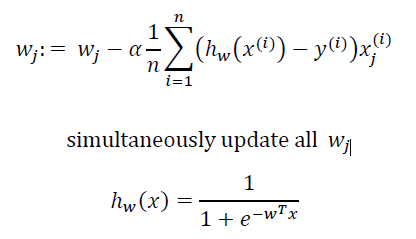

In [8]:
def gradient_descent(X, y, w, learning_rate, iterations):
    cost_log = []
    
    for iteration in range(iterations):
        z = X.dot(w)
        h = sigmoid(z)
        loss = h - y
        gradient = X.T.dot(loss) / len(y)
        w -= learning_rate * gradient
        cost = logloss(h, y)
        cost_log.append(cost)
        
        if (iteration % 5000 == 0) or (iteration == iterations - 1): 
            print(f"Iteration {iteration} | Cost {round(cost, 2)}")

    return w, cost_log

In [9]:
learning_rate = 0.01
iterations = 100000
new_weights, cost_log = gradient_descent(X, y, w, learning_rate, iterations)

Iteration 0 | Cost 1.12
Iteration 5000 | Cost 0.39
Iteration 10000 | Cost 0.34
Iteration 15000 | Cost 0.31
Iteration 20000 | Cost 0.29
Iteration 25000 | Cost 0.28
Iteration 30000 | Cost 0.27
Iteration 35000 | Cost 0.26
Iteration 40000 | Cost 0.25
Iteration 45000 | Cost 0.25
Iteration 50000 | Cost 0.24
Iteration 55000 | Cost 0.24
Iteration 60000 | Cost 0.24
Iteration 65000 | Cost 0.23
Iteration 70000 | Cost 0.23
Iteration 75000 | Cost 0.23
Iteration 80000 | Cost 0.23
Iteration 85000 | Cost 0.22
Iteration 90000 | Cost 0.22
Iteration 95000 | Cost 0.22
Iteration 99999 | Cost 0.22


d) Plot the graph of the cost function and describe how it changes over iterations.

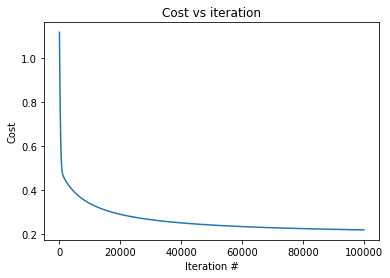

In [11]:
plt.plot(cost_log)
plt.xlabel("Iteration #")
plt.ylabel("Cost")
plt.title("Cost vs iteration")
plt.show()

In [12]:
new_weights

array([-8.28159389,  9.45152772,  8.86967127])

e) Plot points of the first exam score vs the second exam score. And plot the decision boundary using the parameters found by gradient descent on the same graph.

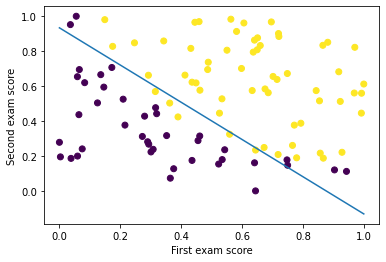

In [13]:
plt.xlabel("First exam score")
plt.ylabel("Second exam score")

plt.scatter(data['exam_1'], data['exam_2'], c=data['admitted'])

x_values = [np.min(data['exam_1']), np.max(data['exam_1'])]
y_values = - (new_weights[0] + np.dot(new_weights[1], x_values)) / new_weights[2]
plt.plot(x_values, y_values)

f) Make predictions of the training data using your trained model, compare predicted labels with actuals label and print the score indicating how well your model performs. You can use accuracy_score function from scikit-learn library. After doing that, check if your model makes correct predictions for these data: {55, 70, 1} and {40, 60, 0}.

In [14]:
def predict(X, threshold=.5):
    x1, x2 = X
    x1 = (x1 - data_orig['exam_1'].min())/data_orig['exam_1'].values.ptp()
    x2 = (x2 - data_orig['exam_2'].min())/data_orig['exam_2'].values.ptp()
    prediction = sigmoid(new_weights[0] * 1 + new_weights[1] * x1 + new_weights[2] * x2)
    return int(prediction >= threshold)

In [15]:
X_test = [[55, 70], [40, 60]]
y_test = [1, 0]

print(f"Student #1: Prediction: {predict(X_test[0])} | Actual: 1")
print(f"Student #2: Prediction: {predict(X_test[1])} | Actual: 0")

Student #1: Prediction: 1 | Actual: 1
Student #2: Prediction: 0 | Actual: 0


# 4. Logistic Regression using library

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y.values.flatten(),predicted_classes)
parameters = model.coef_
print("Parameters are :", parameters)
print("Accuracy is : ", accuracy)

Parameters are : [[1.45627324e-08 3.12282175e+00 2.82350117e+00]]
Accuracy is :  0.93


In [17]:
from sklearn import linear_model
classifier = linear_model.LogisticRegression()
classifier.fit(X[:, 1:], y)

LogisticRegression()

In [18]:
def predict_logr(X, threshold=.5):
    x1, x2 = X
    x1 = (x1 - data_orig['exam_1'].min())/data_orig['exam_1'].values.ptp()
    x2 = (x2 - data_orig['exam_2'].min())/data_orig['exam_2'].values.ptp()
    prediction = classifier.predict(np.array([[x1, x2]]))
    return int(prediction >= threshold)

In [19]:
print("Coefficients: \n", classifier.coef_)
print(f"Student #1: Prediction: {round(predict_logr(X_test[0]), 2)} | Actual: 1")
print(f"Student #2: Prediction: {round(predict_logr(X_test[1]), 2)} | Actual: 0")

Coefficients: 
 [[3.12281937 2.82347911]]
Student #1: Prediction: 1 | Actual: 1
Student #2: Prediction: 0 | Actual: 0
